# Website Traffic Analysis

## Assignment

The goal of this project is to understand this traffic better, in particular the volume and distribution of events, and to develop ideas how to increase the links' clickrates. With that in mind, please analyze the data using the Python libraries Pandas and SciPy where indicated, providing answers to the presented questions:

1. [Pandas] How many total pageview events did the links in the provided dataset receive in the full period, how many per day?
2. [Pandas] What about the other recorded events?
3. [Pandas] Which countries did the pageviews come from?
4. [Pandas] What was the overall click rate (clicks/pageviews)?
5. [Pandas] How does the clickrate distribute across different links?
6. [Pandas & SciPy] Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

## Data Description

The data set provided (traffic.csv) contains web traffic data ("events") from a few different pages ("links") over a period of 7 days including various categorical dimensions about the geographic origin of that traffic as well as a page's content: isrc.

In [116]:
import pandas as pd

data = pd.read_csv("/Users/rosiebai/Downloads/datasets-10/traffic.csv")

In [117]:
data.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [118]:
data.event.unique()

array(['click', 'preview', 'pageview'], dtype=object)

### 1. How many total pageview events did the links in the provided dataset receive in the full period, how many per day?


In [119]:
daily_pageviews = data[data['event'] == 'pageview'].groupby('date')['linkid'].count().reset_index(name = 'n_pageviews').sort_values(by = 'date')
daily_pageviews

,date,n_pageviews
0,2021-08-19,22366
1,2021-08-20,21382
2,2021-08-21,21349
3,2021-08-22,20430
4,2021-08-23,18646
5,2021-08-24,18693
6,2021-08-25,19149


### 2. What about the other recorded events?

In [120]:
daily_clicks = (data[data['event'] == 'click'].groupby('date')['linkid']
                .count()
                .reset_index(name = 'n_clicks')
                .sort_values(by = 'date'))
daily_clicks

,date,n_clicks
0,2021-08-19,9207
1,2021-08-20,8508
2,2021-08-21,8071
3,2021-08-22,7854
4,2021-08-23,7315
5,2021-08-24,7301
6,2021-08-25,7476


In [121]:
daily_previews = (data[data['event'] == 'preview'].groupby('date')['linkid']
                  .count()
                  .reset_index(name = 'n_previews')
                  .sort_values(by = 'date'))
daily_previews

,date,n_previews
0,2021-08-19,3788
1,2021-08-20,4222
2,2021-08-21,4663
3,2021-08-22,4349
4,2021-08-23,3847
5,2021-08-24,3840
6,2021-08-25,3822


### 3. Which countries did the pageviews come from?

In [122]:
pageviews_per_country = (data[data['event'] == 'pageview'].groupby('country')['linkid']
                         .count()
                         .reset_index(name = 'n_pageviews')
                         .sort_values(by = 'n_pageviews', ascending=False))
pageviews_per_country['total'] = pageviews_per_country['n_pageviews'].sum()
pageviews_per_country['pct_pageviews'] = round((pageviews_per_country['n_pageviews']/pageviews_per_country['total'])*100,2)
pageviews_per_country

,country,n_pageviews,total,pct_pageviews
166,Saudi Arabia,28873,142006,20.33
88,India,27286,142006,19.21
201,United States,20839,142006,14.67
65,France,9674,142006,6.81
91,Iraq,4897,142006,3.45
...,...,...,...,...
38,Central African Republic,1,142006,0.00
206,Wallis and Futuna,1,142006,0.00
155,Principality of Monaco,1,142006,0.00
163,Saint Martin,1,142006,0.00


20% of the pageviews are from Saudi Arabia. 19% are from India. 15% are from the U.S.

### 4.What was the overall click rate (clicks/pageviews)?

In [123]:
data.event.value_counts()

event
pageview    142015
click        55732
preview      28531
Name: count, dtype: int64

In [124]:
# the overall click rate
55732/142015

0.3924374185825441

### 5. How does the clickrate distribute across different links?

In [125]:
# clickrate per link
n_clicks = data[data['event'] == 'click'].groupby('linkid').size().reset_index(name = 'n_clicks')
n_pageviews = data[data['event'] == 'pageview'].groupby('linkid').size().reset_index(name = 'n_pageviews')
clickrate_per_link = n_pageviews.merge(n_clicks, on = 'linkid', how = 'left')
clickrate_per_link['clickrate'] = round((clickrate_per_link['n_clicks']/clickrate_per_link['n_pageviews'])*100, 2)
clickrate_per_link = clickrate_per_link.dropna(axis = 0)
clickrate_per_link

,linkid,n_pageviews,n_clicks,clickrate
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2.0,100.00
6,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1.0,100.00
9,0063a982-41cd-5629-96d0-e1c4dd72ea11,3,2.0,66.67
10,006af6a0-1f0d-4b0c-93bf-756af9071c06,36,8.0,22.22
11,00759b81-3f04-4a61-b934-f8fb3185f4a0,4,3.0,75.00
...,...,...,...,...
3829,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,84,29.0,34.52
3832,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1.0,100.00
3834,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1.0,100.00
3835,fffc17a7-f935-5d3e-bd3e-d761fd80d479,2,1.0,50.00


In [126]:
clickrate_per_link[clickrate_per_link['clickrate']== 9230]

,linkid,n_pageviews,n_clicks,clickrate
3027,c95f1fc1-fab0-4c74-b3f5-52bd3684a713,10,923.0,9230.0


In [127]:
# summary statistics of click rate
clickrate_per_link['clickrate'].describe()

count    2253.000000
mean       80.991988
std       195.803035
min         9.090000
25%        50.000000
50%       100.000000
75%       100.000000
max      9230.000000
Name: clickrate, dtype: float64

On average, the click rate of each link is around 81%. The minimum click rate can be 9%, and the max can be 9230%, which is that they previewed the link 10 times, but clicked it 923 times. 

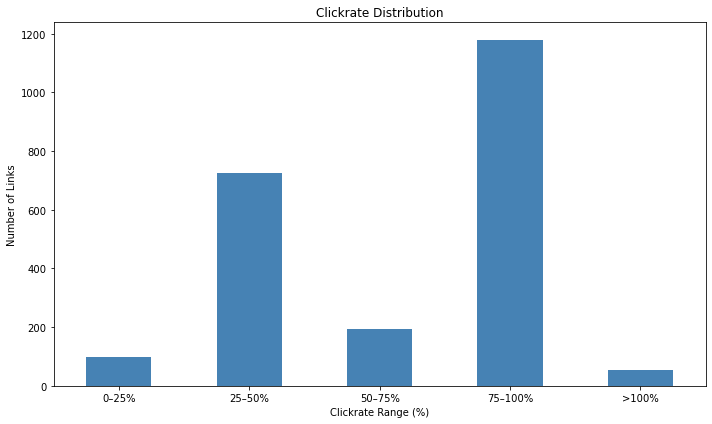

In [128]:
import matplotlib.pyplot as plt

# Define custom bins and labels
bins = [0, 25, 50, 75, 100, float('inf')]
labels = ['0–25%', '25–50%', '50–75%', '75–100%', '>100%']

# Cut the clickrates into bins
clickrate_per_link['clickrate_bin'] = pd.cut(clickrate_per_link['clickrate'], bins=bins, labels=labels, right=True)

# Count number of links in each bin
clickrate_bin_counts = clickrate_per_link['clickrate_bin'].value_counts().sort_index()

# Plot
clickrate_bin_counts.plot(kind='bar', figsize=(10, 6), color='steelblue')
plt.xlabel('Clickrate Range (%)')
plt.ylabel('Number of Links')
plt.title('Clickrate Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 6. Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

In [129]:
# Correlation between n_clicks and n_previews at link level
click_preview_data = (data[(data['event'] == 'click')| (data['event'] == 'preview')]
                      .groupby(['linkid','event'])
                      .size()
                      .reset_index(name = 'count'))

click_preview_pivot = click_preview_data.pivot(index = 'linkid', 
                                               columns='event', 
                                               values = 'count').fillna(0)
click_preview_pivot

event,click,preview
linkid,,
00126b32-0c35-507b-981c-02c80d2aa8e7,2.0,0.0
004b9724-abca-5481-b6e9-6148a7ca00a5,1.0,0.0
0063a982-41cd-5629-96d0-e1c4dd72ea11,2.0,0.0
006af6a0-1f0d-4b0c-93bf-756af9071c06,8.0,11.0
00759b81-3f04-4a61-b934-f8fb3185f4a0,3.0,1.0
...,...,...
ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29.0,21.0
fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1.0,0.0
fff84c0e-90a1-59d8-9997-adc909d50e16,1.0,0.0


In [130]:
correlation = click_preview_pivot[['click','preview']].corr()
correlation

event,click,preview
event,,
click,1.000000,0.988681
preview,0.988681,1.000000


In [131]:
from scipy.stats import pearsonr

corr_val, p_val = pearsonr(click_preview_pivot['click'], click_preview_pivot['preview'])
print(f"Correlation: {corr_val:.4f}, p-value: {p_val:.4e}")


Correlation: 0.9887, p-value: 0.0000e+00


The correlation is pretty strong: 0.9887. P-value is less than 0.05 so we can reject the null and claim that the correlation between clicks and previews is statistically significant. 

Is there a nonlinear or categorical pattern?

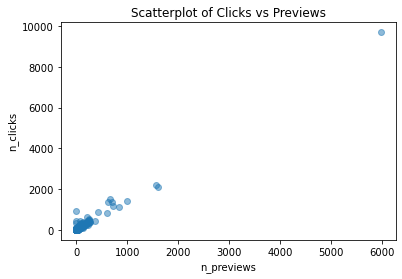

In [132]:
# check for nonlinearity
import matplotlib.pyplot as plt

plt.scatter(click_preview_pivot['preview'], click_preview_pivot['click'], alpha=0.5)
plt.xlabel('n_previews')
plt.ylabel('n_clicks')
plt.title('Scatterplot of Clicks vs Previews')
plt.show()


Do previews (binary: yes/no) predict whether a link gets clicks (binary: yes/no)?

In [133]:
click_preview_pivot['clicked'] = (click_preview_pivot['click'] > 0).astype(int)
click_preview_pivot['previewed'] = (click_preview_pivot['preview'] > 0).astype(int)
contingency = pd.crosstab(click_preview_pivot['previewed'], click_preview_pivot['clicked'])
contingency


clicked,0,1
previewed,,
0,0,1791
1,31,464


This table shows how often a link:
- Was previewed but not clicked
- Clicked but not previewed
- Both
- Neither

In [134]:
# Perform a Chi-Square Test of Independence
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi2 = {chi2:.4f}, p-value = {p:.4e}")


Chi2 = 109.0721, p-value = 1.5649e-25


Interpretation:
- Null Hypothesis (H₀): Click and preview are independent (no relationship).
- Alternative (H₁): There is a relationship between click and preview.
- Since p < 0.05. Reject H₀ → Significant association between clicking and previewing.


In [135]:
# Measure the Strength of the Relationship (Effect Size)
import numpy as np

n = contingency.sum().sum()
phi2 = chi2 / n
r, k = contingency.shape
cramers_v = np.sqrt(phi2 / min(k - 1, r - 1))
print(f"Cramér’s V: {cramers_v:.4f}")


Cramér’s V: 0.2184


So there is a categorical pattern between clicks and previews.